The <b>mean squared error</b> has increased. So this shows that a single feature is not a good predictor of housing prices.

** To-Do 1: Make a train-test split and calculate the mean squared error for training data and test data.**

** To-Do 2: Plot the residuals for training and test datasets**

**In the next section, we are going to read in a feather file and assemble the dataset in one Pandas dataframe that 
we can work with.**
Refer to the "explore_questionnaire.pdf" in the folder for detailed explanation of the dataset.

<img src="./w56.png"/>

To install and run feather use:

**pip install feather-format** -- or else, (if you get import error) **pip install feather-format**

In [ ]:
import feather
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

# Read feather frames to individual variables

anp_df = feather.read_dataframe('data_science_case/anp.feather')
face_df = feather.read_dataframe('data_science_case/face.feather')
image_df = feather.read_dataframe('data_science_case/image_data.feather')
metrics_df = feather.read_dataframe('data_science_case/image_metrics.feather')
object_labels_df = feather.read_dataframe('data_science_case/object_labels.feather')
survey_df = feather.read_dataframe('data_science_case/survey.feather')

# Open in Pickle

In [ ]:
# import pickle
# import numpy
# import pandas as pd
# import matplotlib.pyplot as plt
# from pandas.tools.plotting import scatter_matrix

# def Open_Pickle(dataframe):
#     with open (dataframe, 'rb') as f:
#         return pickle.load(f)
    
    
# anp_df = Open_Pickle('data_science_case/anp.pkl')
# face_df = Open_Pickle('data_science_case/face.pkl')
# image_df = Open_Pickle('data_science_case/image_data.pkl')
# metrics_df = Open_Pickle('data_science_case/image_metrics.pkl')
# object_labels_df = Open_Pickle('data_science_case/object_labels.pkl')
# survey_df = Open_Pickle('data_science_case/survey.pkl')

# Exploratory  section:

Moved to the Marketing_exploratory.ipynb

# Some preprocessing before merging

In [ ]:
#Drop unnecessary columns in image_df dataframework
image_df.head()
drop = ['image_link','image_url','image_posted_time_unix','user_full_name',\
        'user_name','user_website','user_profile_pic','user_bio']

image_df =  image_df.drop(drop,axis=1)
image_df.head()

,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos
0,1316962883971761394_3468175004,640.0,640.0,Lo-fi,14-08-2016 22:37:11,0.800521,3468175004,7.0,0.0,1.0
1,552382455733335946_263042348,612.0,612.0,Normal,25-09-2013 00:32:21,0.875568,263042348,316.0,347.0,73.0
2,594552614686078174_263042348,640.0,640.0,Vesper,22-11-2013 04:56:56,0.672679,263042348,316.0,347.0,73.0
3,553884883234370621_263042348,640.0,640.0,Amaro,27-09-2013 02:17:25,0.843525,263042348,316.0,347.0,73.0
4,725551583154452417_263042348,640.0,640.0,Amaro,21-05-2014 22:48:30,0.859796,263042348,316.0,347.0,73.0


In [22]:
#possible feature?
#add image ratio and drop height/width?

#TODO: calculate total pixels, find correlation with perma score, if non, drop the width & height, just keep the ratio

In [ ]:
#Drop unnecessary columns in metrics_df dataframework
metrics_df.head()
drop = ['comment_count_time_created','like_count_time_created']
metrics_df =  metrics_df.drop(drop,axis=1)
metrics_df.head()

,image_id,comment_count,like_count
0,1337283311810249709_3041716852,0.0,15.0
1,1337283311810249709_3041716852,0.0,15.0
2,1337834353379743556_3041716852,0.0,23.0
3,1337834353379743556_3041716852,0.0,23.0
4,1516356155708878303_3041716852,5.0,19.0


In [17]:
#Drop unnecessary columns in survey_df dataframework---MIGHT NEED MORE  COLUMNS!!!
print 'The survey started at: '+str(survey_df['start_q'].min())
print 'The survey ended at: '+str(survey_df['end_q'].max())+'\n\n'
survey_df['start_q'] = pd.to_datetime(survey_df['start_q'], format = '%Y-%m-%d %H:%M:%S')
survey_df['end_q'] = pd.to_datetime(survey_df['end_q'], format = '%Y-%m-%d %H:%M:%S')
start_survey =survey_df['start_q'].min()
end_survey = survey_df['end_q'].max()
drop = ['participate','completed','start_q','end_q','network_id','private_account']
survey_df =  survey_df.drop(drop,axis=1)
survey_df.head()

The survey started at: 2016-12-05 14:01:21
The survey ended at: 2017-03-23 15:16:17




,id,gender,born,education,employed,income,A_2,N_1,P_1,E_1,...,insta_user_id,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount
0,920bf027f7d13dbdc7b66b3d3324903c,Male,1975,College graduate,Employed for wages,"$30,000 to $39,999",4,5,5,3,...,6.198686e+08,5,3.0,6.0,6.0,4.0,5,5.0,5,465.0
1,b433b2bfe49e28d0b7c45925b53084e0,Male,1978,College graduate,Employed for wages,"$20,000 to $29,999",8,0,9,7,...,1.879203e+08,9,7.0,9.0,8.0,7.0,9,0.0,9,6.0
2,4becd8768d42ffa6ef0a17d827f230a2,Male,1980,High school graduate,Self-employed,"$40,000 to $49,999",7,7,6,9,...,5.133243e+08,6,9.0,6.0,6.0,8.0,6,7.0,6,NaN
3,01d90eeb34866d03c52925738da7865f,Male,1959,College graduate,Employed for wages,"$10,000 to $19,999",6,4,1,5,...,3.437021e+09,1,5.0,3.0,3.0,3.0,1,4.0,1,NaN
4,f4f54676f75f47c17dc434cf68845328,Female,1990,High school graduate,Employed for wages,"$80,000 to $89,999",7,3,8,7,...,3.342091e+07,8,7.0,8.0,8.0,7.0,8,3.0,8,767.0


# Merging of the Image elements

In [18]:
# Merge them based on the image_id so that we have a large data frame containing all the elements

image_anp_frame = pd.merge(image_df, anp_df, how='inner', on='image_id')
im_anp_obj_frame = pd.merge(image_anp_frame, object_labels_df, how='inner', on='image_id')
im_anp_obj_face_frame = pd.merge(im_anp_obj_frame, face_df, how='inner', on='image_id')


In [19]:
im_anp_obj_face_frame.shape

(3887625, 32)

In [20]:
im_anp_obj_face_frame.head()

,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,...,face_beard,face_beard_confidence,face_mustache,face_mustache_confidence,face_smile,face_smile_confidence,eyeglasses,eyeglasses_confidence,face_emo,emo_confidence
0,552382455733335946_263042348,612.0,612.0,Normal,25-09-2013 00:32:21,0.875568,263042348,316.0,347.0,73.0,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,HAPPY,96.51368
1,552382455733335946_263042348,612.0,612.0,Normal,25-09-2013 00:32:21,0.875568,263042348,316.0,347.0,73.0,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,SAD,2.52015
2,552382455733335946_263042348,612.0,612.0,Normal,25-09-2013 00:32:21,0.875568,263042348,316.0,347.0,73.0,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,SURPRISED,11.01824
3,552382455733335946_263042348,612.0,612.0,Normal,25-09-2013 00:32:21,0.875568,263042348,316.0,347.0,73.0,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,HAPPY,96.51368
4,552382455733335946_263042348,612.0,612.0,Normal,25-09-2013 00:32:21,0.875568,263042348,316.0,347.0,73.0,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,SAD,2.52015


In [21]:
print 'The number of unique users who took the Survey is: '+str(len(survey_df['insta_user_id'].unique()))
print 'The number of unique users in  the image data-set is: '+str(len(im_anp_obj_face_frame['user_id'].unique()))

The number of unique users who took the Survey is: 329
The number of unique users in  the image data-set is: 144


It seems that there is a conflict between the <b>'user-id'</b> in the <b>im_anp_obj_face_frame</b> dataframe and the <b>'insta_user_id'</b> in the <b>survey_df</b> dateframe. This conflict exists because the two columns are from different format (one is a string and the other a float). In  order to be able to merge them we need to convert the string values to  float.

In [22]:
im_anp_obj_face_frame['user_id'] = im_anp_obj_face_frame['user_id'].apply(lambda x : float(x))

In [23]:
#convert all the image_posted_time strings to datime object for tracking the year of creation
im_anp_obj_face_frame['image_posted_time'] = pd.to_datetime(im_anp_obj_face_frame['image_posted_time'], format = '%d-%m-%Y %H:%M:%S' )

In [24]:
print start_survey
print end_survey  

2016-12-05 14:01:21
2017-03-23 15:16:17


In [25]:
from dateutil.relativedelta import relativedelta
import datetime

def change_time_intervals(time,  num_months):
    three_mon_rel = relativedelta(months=num_months)
    return time +three_mon_rel

#test the function
change_time_intervals(end_survey,-3)

Timestamp('2016-12-23 15:16:17')

In [27]:

last_years_images = im_anp_obj_face_frame[(im_anp_obj_face_frame.image_posted_time>=change_time_intervals(end_survey,-3)) & (im_anp_obj_face_frame.image_posted_time<=change_time_intervals(start_survey,3) )]
print 'The last year dataframe has '+ str(len(last_years_images['user_id'].unique()))+' users.'
print last_years_images.shape

The last year dataframe has 89 users.
(116934, 32)


In [28]:
# last_years_images = im_anp_obj_face_frame[(im_anp_obj_face_frame.image_posted_time>=change_time_intervals(end_survey,-6)) & (im_anp_obj_face_frame.image_posted_time<=change_time_intervals(start_survey,6) )]
# print 'The last year dataframe has '+ str(len(last_years_images['user_id'].unique()))+' users.'
# print test.shape

In [29]:
#keeps only the last two year images of the users
# years = ['2016','2017']
# last_years = im_anp_obj_face_frame['image_posted_time'].apply(lambda x : True if str(x.year) in years else False)
# last_years_images = im_anp_obj_face_frame[last_years.values]
# print 'The last year dataframe has '+ str(len(last_years_images['user_id'].unique()))+' users.'

In [30]:
#merge the image dataframe with the survey dataframe 
image_survey = pd.merge(last_years_images,survey_df,left_on='user_id',right_on = 'insta_user_id')
print image_survey.shape
print 'The merging dataframe has '+ str(len(image_survey['user_id'].unique()))+' users.'

(121143, 71)
The merging dataframe has 89 users.


# Further Pre-Processing

Because there are some missing values (NaN)  in the of the explanatory variables of the merging dataframework we need to further pre process our data by excluding the rows that have NaN values.

In [31]:
image_survey = image_survey.dropna()
print image_survey.shape
print 'The merging dataframe has '+ str(len(image_survey['user_id'].unique()))+' users.'

(120693, 71)
The merging dataframe has 88 users.


In [32]:
#drop duplicates
image_survey = image_survey.drop_duplicates()
print image_survey.shape
print 'The merging dataframe has '+ str(len(image_survey['user_id'].unique()))+' users.'

(120693, 71)
The merging dataframe has 88 users.


In [33]:
image_survey.sample(5)

,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,...,insta_user_id,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount
9191,1459835389077435576_3041716852,640.0,640.0,Normal,2017-02-28 01:39:21,0.854783,3.041717e+09,228.0,526.0,779.0,...,3.041717e+09,5,5.0,5.0,2.0,2.0,5,7.0,5,755.0
98333,1425691224521706175_703978203,477.0,480.0,Normal,2017-01-11 23:00:59,0.805700,7.039782e+08,687.0,376.0,2277.0,...,7.039782e+08,8,7.0,6.0,7.0,7.0,8,6.0,8,1530.0
84209,1432521137518257248_1600397470,640.0,640.0,Clarendon,2017-01-21 09:10:48,0.908727,1.600397e+09,469.0,125.0,448.0,...,1.600397e+09,9,8.0,8.0,10.0,10.0,9,8.0,9,447.0
26451,1458502272769123052_55281515,640.0,640.0,Normal,2017-02-26 05:30:41,0.898688,5.528152e+07,206.0,102.0,336.0,...,5.528152e+07,6,6.0,7.0,5.0,4.0,6,7.0,6,331.0
76116,1417697745049215087_143763900,640.0,640.0,Gingham,2016-12-31 22:19:22,0.903475,1.437639e+08,456.0,190.0,772.0,...,1.437639e+08,8,9.0,6.0,8.0,6.0,8,5.0,8,771.0


In [34]:
image_survey.ix[:,:10].sample(5)

/home/aris/anaconda2/envs/tweets_USA/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos
84546,1459726943913910348_276232195,640.0,640.0,Reyes,2017-02-27 22:03:53,0.863362,2.762322e+08,1199.0,337.0,427.0
119961,1445873514242300114_372088523,640.0,640.0,Normal,2017-02-08 19:19:36,0.836922,3.720885e+08,997.0,816.0,1312.0
34954,1463516950000603259_451627351,644.0,640.0,Clarendon,2017-03-05 03:33:57,0.806371,4.516274e+08,274.0,489.0,348.0
22019,1429077905682326450_619868570,640.0,640.0,Normal,2017-01-16 15:09:43,0.875930,6.198686e+08,612.0,1987.0,469.0
113368,1445828554868621847_1976682131,640.0,640.0,Normal,2017-02-08 17:50:16,0.818892,1.976682e+09,4240.0,4047.0,146.0


# Correlation Coefficients

In [35]:
# Calculate the correlation coefficients. Notice how the main diagonal is 1.00

correlation_matrix = im_anp_obj_face_frame.corr()
correlation_matrix

,image_height,image_width,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,anp_sentiment,emotion_score,data_amz_label_confidence,...,face_sunglasses,face_beard,face_beard_confidence,face_mustache,face_mustache_confidence,face_smile,face_smile_confidence,eyeglasses,eyeglasses_confidence,emo_confidence
image_height,1.000000,0.367477,0.092194,-0.032317,-0.044179,-0.110193,0.056780,0.015892,0.006732,0.014332,...,0.000161,-0.010690,0.010262,-0.007228,0.008502,0.000130,0.008904,0.004826,0.016588,-0.000509
image_width,0.367477,1.000000,-0.048363,0.024987,0.032737,-0.051495,0.062664,-0.008777,-0.003462,0.000225,...,0.001980,0.027605,-0.015589,0.031723,-0.013112,-0.018547,-0.009949,0.008953,0.003785,-0.004968
data_memorability,0.092194,-0.048363,1.000000,-0.028486,-0.010293,-0.046380,-0.067173,0.106849,0.055681,0.032926,...,-0.032094,-0.063643,0.047527,-0.037170,0.044731,0.052936,0.044846,-0.033755,0.083209,-0.003185
user_id,-0.032317,0.024987,-0.028486,1.000000,0.010289,0.067582,-0.166396,-0.014089,-0.012419,-0.003699,...,0.021957,0.033926,-0.049911,0.039764,-0.052432,-0.041536,-0.065157,0.014768,-0.028688,-0.016735
user_followed_by,-0.044179,0.032737,-0.010293,0.010289,1.000000,0.300155,0.150294,-0.011532,0.002684,0.006521,...,-0.011087,0.043988,-0.028013,0.046854,-0.025272,-0.082719,-0.052183,-0.024712,-0.008538,-0.013778
user_follows,-0.110193,-0.051495,-0.046380,0.067582,0.300155,1.000000,0.040369,-0.017019,0.003237,-0.003662,...,0.013937,0.004460,-0.005718,-0.005291,0.001897,0.007140,0.011807,0.010431,-0.003827,0.005050
user_posted_photos,0.056780,0.062664,-0.067173,-0.166396,0.150294,0.040369,1.000000,-0.054813,-0.050928,-0.002424,...,0.018212,0.061977,-0.010526,0.064271,-0.019818,-0.064448,-0.019717,0.083662,-0.024243,-0.005419
anp_sentiment,0.015892,-0.008777,0.106849,-0.014089,-0.011532,-0.017019,-0.054813,1.000000,0.339011,0.005725,...,-0.029941,-0.031011,0.020933,-0.023893,0.019850,0.042821,0.030767,-0.042127,0.017479,0.004419
emotion_score,0.006732,-0.003462,0.055681,-0.012419,0.002684,0.003237,-0.050928,0.339011,1.000000,0.008191,...,-0.007838,-0.029593,0.021920,-0.027413,0.023165,0.039717,0.029398,-0.019903,0.015404,0.006878
data_amz_label_confidence,0.014332,0.000225,0.032926,-0.003699,0.006521,-0.003662,-0.002424,0.005725,0.008191,1.000000,...,-0.002400,0.000109,-0.003093,-0.004050,0.001187,0.002615,-0.001492,-0.004318,0.007987,-0.001657


** To-Do 3: Plot the correlation matrix with color codes corresponding to the how much two attributes are correlated. **

** To-Do 4: Calculate the Spearman rank for the attributes. **

### ASSIGNMENT

In this notebook we learned how to train and test a regressor on numerical data. For this assignment you are required to do the following:

1. Split the data into training and testing splits
2. Train a regressor to predict the PERMA scores on the test set using different sets of attributes (not all of them at once)
3. Analyze which features (attributes) correlate well with each other and help in fitting the curve to the data better.
4. Elaborate on the results.

In [36]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# TO-DO:3


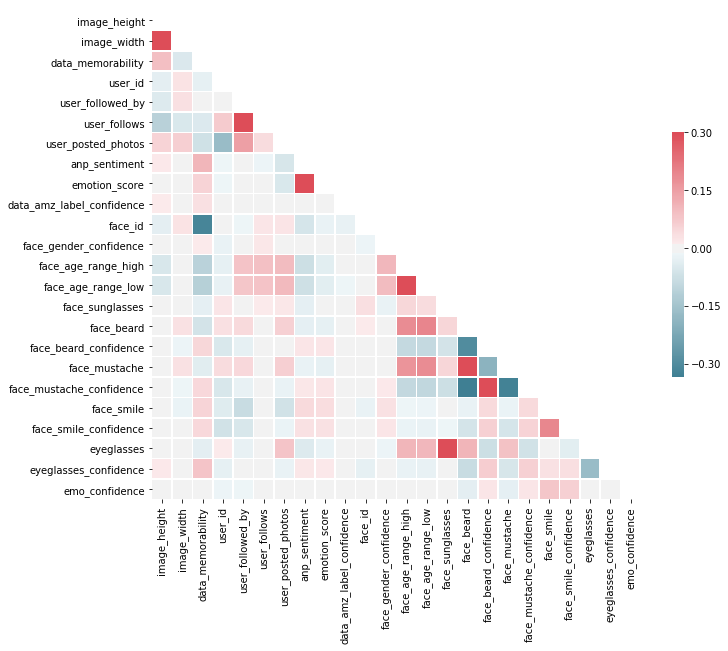

In [37]:

mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [38]:
# Calculate the correlation coefficients. Notice how the main diagonal is 1.00

correlation_matrix_survey = image_survey.corr()
correlation_matrix_survey

,image_height,image_width,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,anp_sentiment,emotion_score,data_amz_label_confidence,...,insta_user_id,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount
image_height,1.000000,0.300656,0.081256,-0.024790,-0.061963,-0.055976,0.030622,0.073723,0.037091,0.035612,...,-0.024790,-0.087567,0.076384,0.017181,-0.019186,-0.134098,-0.087567,0.111433,-0.087567,0.054527
image_width,0.300656,1.000000,-0.065293,-0.130592,0.015701,0.043573,0.044376,0.010695,0.016610,0.036864,...,-0.130592,0.102913,0.158091,-0.017773,0.060645,0.017078,0.102913,-0.059596,0.102913,0.062947
data_memorability,0.081256,-0.065293,1.000000,0.015814,0.011978,-0.016997,0.040531,0.140948,0.066218,0.013459,...,0.015814,0.002731,0.030252,-0.056334,-0.044095,0.017262,0.002731,0.016136,0.002731,0.057050
user_id,-0.024790,-0.130592,0.015814,1.000000,0.008208,0.009159,-0.293211,-0.058693,0.009192,-0.008713,...,1.000000,-0.216031,-0.140806,-0.107360,-0.146609,0.099575,-0.216031,0.115867,-0.216031,-0.381596
user_followed_by,-0.061963,0.015701,0.011978,0.008208,1.000000,0.615065,0.176344,-0.054624,-0.012987,0.001793,...,0.008208,-0.197539,0.162551,-0.101722,-0.208597,-0.151388,-0.197539,-0.005859,-0.197539,0.129174
user_follows,-0.055976,0.043573,-0.016997,0.009159,0.615065,1.000000,-0.001784,-0.057124,-0.006860,0.007687,...,0.009159,-0.178716,0.086905,-0.126635,-0.113680,-0.125835,-0.178716,0.092158,-0.178716,-0.001362
user_posted_photos,0.030622,0.044376,0.040531,-0.293211,0.176344,-0.001784,1.000000,-0.060773,-0.043905,-0.024820,...,-0.293211,-0.036285,-0.014007,-0.309593,-0.290001,-0.195175,-0.036285,-0.082753,-0.036285,0.941484
anp_sentiment,0.073723,0.010695,0.140948,-0.058693,-0.054624,-0.057124,-0.060773,1.000000,0.324124,0.032185,...,-0.058693,0.013177,0.016985,0.044802,0.052376,-0.014158,0.013177,0.061407,0.013177,-0.054570
emotion_score,0.037091,0.016610,0.066218,0.009192,-0.012987,-0.006860,-0.043905,0.324124,1.000000,0.022034,...,0.009192,-0.015529,-0.000505,0.031653,0.021726,0.018786,-0.015529,0.034570,-0.015529,-0.044782
data_amz_label_confidence,0.035612,0.036864,0.013459,-0.008713,0.001793,0.007687,-0.024820,0.032185,0.022034,1.000000,...,-0.008713,-0.013334,0.000474,0.010135,0.034832,0.002188,-0.013334,0.097510,-0.013334,-0.022626


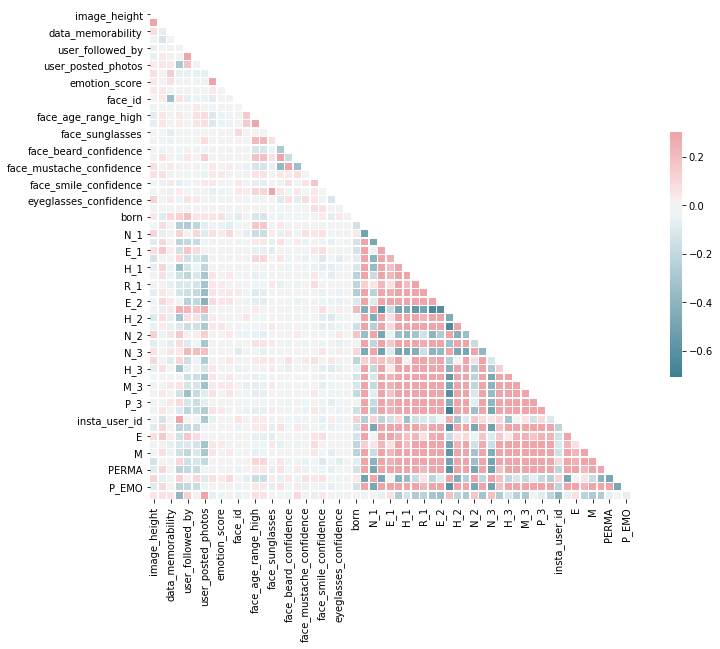

In [39]:
mask = np.zeros_like(correlation_matrix_survey, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix_survey, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Linear Regression

# TO-DO:1

In [40]:
from sklearn.cross_validation import train_test_split

independent_variables = image_survey[list(correlation_matrix)]
dependent_variables = image_survey['PERMA']

x_train, x_test,  y_train, y_test = train_test_split(independent_variables,dependent_variables,test_size=0.2)


/home/aris/anaconda2/envs/tweets_USA/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
print x_train.shape
print x_test.shape

print y_train.shape
print y_test.shape

(96554, 24)
(24139, 24)
(96554,)
(24139,)


# TO-DO:2 

In [42]:
from sklearn.linear_model import LinearRegression
import time

start = time.time()
#This creates a LinearRegression object
lm = LinearRegression()
# Train the model using the training sets
lm.fit(x_train, y_train)

end = time.time()
print(end - start)


0.169086933136


In [43]:
# Make predictions using the testing set
insta_y_pred = lm.predict(x_test)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, insta_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, insta_y_pred))

('Coefficients: \n', array([ -2.05172080e-03,   5.96942477e-03,   7.37702442e-01,
        -4.18639740e-10,  -3.04529735e-04,  -2.13200549e-04,
        -2.19594445e-04,  -2.71321212e-02,  -3.58768217e-01,
        -2.66820613e-03,  -1.66553881e-03,  -2.36647480e-03,
         1.20119415e-03,   3.08285499e-03,  -2.97106658e-01,
         3.23848026e-01,  -1.09074502e-03,  -1.65115102e-01,
        -4.76055629e-03,  -6.15420884e-02,  -4.79559978e-03,
        -1.83584621e-01,  -1.87182924e-03,  -4.12466460e-04]))
Mean squared error: 2.51
Variance score: 0.15


# Different linear library

In [45]:
import statsmodels.formula.api as smf

#REFERENCE---->http://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

columns =list(correlation_matrix)



In [46]:
value ='PERMA~'+ '+'.join(columns)

print value

PERMA~image_height+image_width+data_memorability+user_id+user_followed_by+user_follows+user_posted_photos+anp_sentiment+emotion_score+data_amz_label_confidence+face_id+face_gender_confidence+face_age_range_high+face_age_range_low+face_sunglasses+face_beard+face_beard_confidence+face_mustache+face_mustache_confidence+face_smile+face_smile_confidence+eyeglasses+eyeglasses_confidence+emo_confidence


In [47]:
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula=value, data=image_survey).fit()

# print the coefficients
lm1.params

Intercept                    6.108205e+00
face_sunglasses[T.True]     -2.909414e-01
face_beard[T.True]           3.241870e-01
face_mustache[T.True]       -1.678552e-01
face_smile[T.True]          -5.750381e-02
eyeglasses[T.True]          -1.814942e-01
image_height                -2.048396e-03
image_width                  5.971673e-03
data_memorability            6.525061e-01
user_id                     -4.183538e-10
user_followed_by            -3.136119e-04
user_follows                -2.134693e-04
user_posted_photos          -2.174707e-04
anp_sentiment               -3.319961e-02
emotion_score               -2.683113e-01
data_amz_label_confidence   -2.801530e-03
face_id                     -1.715590e-03
face_gender_confidence      -2.231428e-03
face_age_range_high          1.565164e-03
face_age_range_low           3.150405e-03
face_beard_confidence       -1.157697e-03
face_mustache_confidence    -4.482081e-03
face_smile_confidence       -4.660051e-03
eyeglasses_confidence       -1.792

In [48]:
### STATSMODELS ###

# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PERMA   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     825.9
Date:                Tue, 17 Oct 2017   Prob (F-statistic):               0.00
Time:                        16:43:56   Log-Likelihood:            -2.2598e+05
No. Observations:              120693   AIC:                         4.520e+05
Df Residuals:                  120668   BIC:                         4.523e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     6.1082      0.162     37.784      0.000       5.791       6.425
face_sunglasses[T.True]      -0.2909      0.016    -17.650      0.000      -0.323      -0.259
face_beard[T.True]            0.3242      0.016     20.311      0.000       0.293       0.355
face_mustache[T.True]        -0.1679      0.017     -9.981      0.000      -0.201      -0.135
face_smile[T.True]           -0.0575      0.010     -5.492      0.000      -0.078      -0.037
eyeglasses[T.True]           -0.1815      0.011    -16.186      0.000      -0.203      -0.160
image_height                 -0.0020   4.37e-05    -46.868      0.000      -0.002      -0.002
image_width                   0.0060      0.000     43.350      0.000       0.006       0.006
data_memorability             0.6525      0.094      6.950      0.000       0.468       0.837
user_id                   -4.184e-10   5.12e-12    -81.757      0.000   -4.28e-10   -4.08e-10
user_followed_by             -0.0003   8.73e-06    -35.936      0.000      -0.000      -0.000
user_follows                 -0.0002    6.4e-06    -33.337      0.000      -0.000      -0.000
user_posted_photos           -0.0002   6.75e-06    -32.206      0.000      -0.000      -0.000
anp_sentiment                -0.0332      0.011     -2.947      0.003      -0.055      -0.011
emotion_score                -0.2683      0.066     -4.066      0.000      -0.398      -0.139
data_amz_label_confidence    -0.0028      0.000     -5.753      0.000      -0.004      -0.002
face_id                      -0.0017      0.000    -11.847      0.000      -0.002      -0.001
face_gender_confidence       -0.0022      0.001     -3.275      0.001      -0.004      -0.001
face_age_range_high           0.0016      0.002      0.897      0.370      -0.002       0.005
face_age_range_low            0.0032      0.002      1.273      0.203      -0.002       0.008
face_beard_confidence        -0.0012      0.000     -2.654      0.008      -0.002      -0.000
face_mustache_confidence     -0.0045      0.000     -9.506      0.000      -0.005      -0.004
face_smile_confidence        -0.0047      0.000    -14.519      0.000      -0.005      -0.004
eyeglasses_confidence        -0.0018      0.000     -3.926      0.000      -0.003      -0.001
emo_confidence               -0.0005      0.000     -3.812      0.000      -0.001      -0.000
==============================================================================
Omnibus:                      735.698   Durbin-Watson:                   0.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              742.313
Skew:                           0.186   Prob(JB):                    6.44e-162
Kurtosis:                       2.902   Cond. No.                     4.51e+10
========================================================

In [49]:
# calculate r-square 
lm1.rsquared

0.14108571104895107

In [50]:
### STATSMODELS ###

# print the confidence intervals for the model coefficients
lm1.conf_int()

,0,1
Intercept,5.791350e+00,6.425060e+00
face_sunglasses[T.True],-3.232501e-01,-2.586327e-01
face_beard[T.True],2.929039e-01,3.554701e-01
face_mustache[T.True],-2.008177e-01,-1.348928e-01
face_smile[T.True],-7.802730e-02,-3.698031e-02
eyeglasses[T.True],-2.034713e-01,-1.595171e-01
image_height,-2.134059e-03,-1.962733e-03
image_width,5.701674e-03,6.241671e-03
data_memorability,4.684994e-01,8.365129e-01
user_id,-4.283832e-10,-4.083245e-10


In [51]:
y_predict = lm1.predict(x_test)
y_predict.head()

81837     7.573087
112787    7.608691
29521     7.049610
81059     5.929362
103922    6.365098
dtype: float64

In [52]:
#sklearn predictions
insta_y_pred[:5]

array([ 7.57549423,  7.61102744,  7.03911711,  5.91327456,  6.36764928])

# Plot the residuals

In [53]:
residuals = y_test - insta_y_pred
residuals.head()

81837    -3.575494
112787    1.388973
29521     2.960883
81059     0.086725
103922   -0.367649
Name: PERMA, dtype: float64

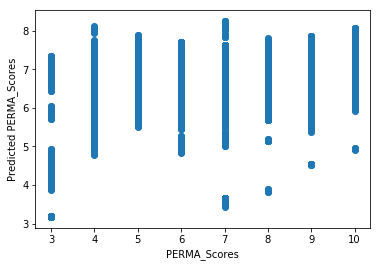

In [54]:
#PERMA Scores are from  1-10

plt.scatter(y_test, insta_y_pred)
plt.xlabel("PERMA_Scores")
plt.ylabel("Predicted PERMA_Scores")
plt.title("")
plt.show()

It is clear that the regression model doesnt give accurate predictions for all the variables at once.

# Start-Analysis

In [55]:
def subtrack_features(main_list, subtr_features):
    
    new = [item for item in main_list if item not in subtr_features]
    
    return new

def prepare_set_statmodel(features):
    
    return 'PERMA~'+ '+'.join(features)


def regression_stats(formula,data):
    # create a fitted model with all three features
    lm = smf.ols(formula= formula, data=data).fit()
    print lm.params
    return lm
    

In [56]:
#print len(columns)
unnecessary = ['face_age_range_high','face_age_range_low','face_mustache','face_beard','user_id','face_id']


features = subtrack_features(columns,unnecessary)
print "The number of features are: "+str(len(features))+'\n'

print prepare_set_statmodel(features)


The number of features are: 18

PERMA~image_height+image_width+data_memorability+user_followed_by+user_follows+user_posted_photos+anp_sentiment+emotion_score+data_amz_label_confidence+face_gender_confidence+face_sunglasses+face_beard_confidence+face_mustache_confidence+face_smile+face_smile_confidence+eyeglasses+eyeglasses_confidence+emo_confidence


In [57]:
metrics_df.head()

,image_id,comment_count,like_count
0,1337283311810249709_3041716852,0.0,15.0
1,1337283311810249709_3041716852,0.0,15.0
2,1337834353379743556_3041716852,0.0,23.0
3,1337834353379743556_3041716852,0.0,23.0
4,1516356155708878303_3041716852,5.0,19.0


In [58]:
##TRY ANOTHER ONE BY EXTRACTING SOME FEATURES
### STATSMODELS ###
lm_model = regression_stats(prepare_set_statmodel(features),image_survey)
lm_model.summary() 

Intercept                    4.662756
face_sunglasses[T.True]     -0.270704
face_smile[T.True]          -0.049410
eyeglasses[T.True]          -0.188632
image_height                -0.002188
image_width                  0.007404
data_memorability            0.742069
user_followed_by            -0.000368
user_follows                -0.000188
user_posted_photos          -0.000040
anp_sentiment                0.040845
emotion_score               -0.451047
data_amz_label_confidence   -0.002707
face_gender_confidence       0.000688
face_beard_confidence       -0.001844
face_mustache_confidence    -0.006720
face_smile_confidence       -0.003940
eyeglasses_confidence       -0.000486
emo_confidence              -0.000429
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PERMA   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     646.0
Date:                Tue, 17 Oct 2017   Prob (F-statistic):               0.00
Time:                        16:44:21   Log-Likelihood:            -2.2961e+05
No. Observations:              120693   AIC:                         4.593e+05
Df Residuals:                  120674   BIC:                         4.594e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     4.6628      0.159     29.321      0.000       4.351       4.974
face_sunglasses[T.True]      -0.2707      0.017    -16.013      0.000      -0.304      -0.238
face_smile[T.True]           -0.0494      0.011     -4.602      0.000      -0.070      -0.028
eyeglasses[T.True]           -0.1886      0.011    -16.411      0.000      -0.211      -0.166
image_height                 -0.0022   4.48e-05    -48.898      0.000      -0.002      -0.002
image_width                   0.0074      0.000     52.928      0.000       0.007       0.008
data_memorability             0.7421      0.091      8.162      0.000       0.564       0.920
user_followed_by             -0.0004   8.94e-06    -41.191      0.000      -0.000      -0.000
user_follows                 -0.0002   6.57e-06    -28.586      0.000      -0.000      -0.000
user_posted_photos        -4.031e-05   6.56e-06     -6.142      0.000   -5.32e-05   -2.74e-05
anp_sentiment                 0.0408      0.012      3.544      0.000       0.018       0.063
emotion_score                -0.4510      0.068     -6.640      0.000      -0.584      -0.318
data_amz_label_confidence    -0.0027      0.001     -5.398      0.000      -0.004      -0.002
face_gender_confidence        0.0007      0.001      0.992      0.321      -0.001       0.002
face_beard_confidence        -0.0018      0.000     -4.179      0.000      -0.003      -0.001
face_mustache_confidence     -0.0067      0.000    -14.646      0.000      -0.008      -0.006
face_smile_confidence        -0.0039      0.000    -11.982      0.000      -0.005      -0.003
eyeglasses_confidence        -0.0005      0.000     -1.037      0.300      -0.001       0.000
emo_confidence               -0.0004      0.000     -3.197      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     1590.574   Durbin-Watson:                   0.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1270.949
Skew:                           0.176   Prob(JB):                    1.04e-276
Kurtosis:                       2.641   Cond. No.                     6.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Average the data

In [59]:
#One solution for training is to average the data as the lecturer proposed
image_survey_avg = image_survey.groupby(['user_id']).mean()
print image_survey_avg.shape
#Megeimage_survey_avg.sample(5)

(88, 57)


In [60]:
#Merge Big dataframe to metrics

image_survey_metrics = pd.merge(image_survey, metrics_df, how='inner', on='image_id')
image_survey_metrics = image_survey_metrics.dropna()
print 'The number of unique users in dataframe is: '+str(len(image_survey_metrics['user_id'].unique()))

The number of unique users in dataframe is: 86


In [61]:
image_survey_metrics.sample(5)

,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,...,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount,comment_count,like_count
110046,1456970662148418507_4249629173,800.0,640.0,Normal,2017-02-24 02:47:39,0.806936,4.249629e+09,86.0,112.0,46.0,...,7.0,3.0,6.0,7.0,4,5.0,4,45.0,0.0,8.0
7935,1439568448975538594_34069800,640.0,640.0,Vesper,2017-01-31 02:32:33,0.843920,3.406980e+07,456.0,455.0,757.0,...,7.0,9.0,9.0,6.0,7,7.0,7,750.0,1.0,14.0
74293,1454066587598267315_1708321363,640.0,640.0,Normal,2017-02-20 02:37:46,0.796557,1.708321e+09,284.0,376.0,103.0,...,8.0,8.0,7.0,7.0,6,8.0,6,100.0,0.0,10.0
54751,1435138436104623293_244047076,640.0,640.0,Normal,2017-01-24 23:50:55,0.857251,2.440471e+08,274.0,289.0,221.0,...,7.0,6.0,6.0,6.0,7,4.0,7,220.0,1.0,27.0
75719,1420473292007699678_249861555,646.0,640.0,Normal,2017-01-04 18:13:53,0.877331,2.498616e+08,445.0,5154.0,691.0,...,7.0,5.0,7.0,6.0,6,9.0,6,689.0,0.0,15.0


In [62]:
image_survey_avg = image_survey_metrics.groupby(['user_id']).mean()
print image_survey_avg.shape

(86, 59)


In [63]:
#Add the features of the metrics to the main features list
features = list(correlation_matrix)
features.append(u'like_count')
features.append(u'comment_count')
features.remove(u'user_id')
#features+['like_count','comment_count
print features

[u'image_height', u'image_width', u'data_memorability', u'user_followed_by', u'user_follows', u'user_posted_photos', u'anp_sentiment', u'emotion_score', u'data_amz_label_confidence', u'face_id', u'face_gender_confidence', u'face_age_range_high', u'face_age_range_low', u'face_sunglasses', u'face_beard', u'face_beard_confidence', u'face_mustache', u'face_mustache_confidence', u'face_smile', u'face_smile_confidence', u'eyeglasses', u'eyeglasses_confidence', u'emo_confidence', u'like_count', u'comment_count']


In [64]:
##TRY ANOTHER ONE BY EXTRACTING SOME FEATURES
### STATSMODELS ###
#We are going to fit the average of the data of the users

lm2_model = regression_stats(prepare_set_statmodel(features),image_survey_avg)
lm2_model.summary() 

Intercept                    6.174855
image_height                -0.002326
image_width                  0.004115
data_memorability           -5.184653
user_followed_by            -0.000430
user_follows                 0.000179
user_posted_photos          -0.000333
anp_sentiment                1.022028
emotion_score               -2.464479
data_amz_label_confidence    0.088819
face_id                     -0.008336
face_gender_confidence       0.005938
face_age_range_high         -0.235864
face_age_range_low           0.299721
face_sunglasses             -1.179993
face_beard                   3.043109
face_beard_confidence       -0.001491
face_mustache               -2.163540
face_mustache_confidence    -0.000250
face_smile                   1.599311
face_smile_confidence       -0.024788
eyeglasses                  -0.615013
eyeglasses_confidence       -0.000424
emo_confidence              -0.045941
like_count                   0.004543
comment_count                0.211362
dtype: float

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PERMA   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.9811
Date:                Tue, 17 Oct 2017   Prob (F-statistic):              0.504
Time:                        16:45:14   Log-Likelihood:                -153.16
No. Observations:                  86   AIC:                             358.3
Df Residuals:                      60   BIC:                             422.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     6.1749     14.413      0.428      0.670     -22.655      35.005
image_height                 -0.0023      0.004     -0.648      0.519      -0.010       0.005
image_width                   0.0041      0.009      0.479      0.634      -0.013       0.021
data_memorability            -5.1847      6.451     -0.804      0.425     -18.089       7.719
user_followed_by             -0.0004      0.000     -0.982      0.330      -0.001       0.000
user_follows                  0.0002      0.000      0.665      0.509      -0.000       0.001
user_posted_photos           -0.0003      0.000     -0.840      0.404      -0.001       0.000
anp_sentiment                 1.0220      2.078      0.492      0.625      -3.135       5.179
emotion_score                -2.4645     10.232     -0.241      0.810     -22.932      18.003
data_amz_label_confidence     0.0888      0.063      1.417      0.162      -0.037       0.214
face_id                      -0.0083      0.015     -0.554      0.581      -0.038       0.022
face_gender_confidence        0.0059      0.088      0.067      0.947      -0.171       0.182
face_age_range_high          -0.2359      0.171     -1.377      0.174      -0.578       0.107
face_age_range_low            0.2997      0.244      1.228      0.224      -0.188       0.788
face_sunglasses              -1.1800      1.153     -1.023      0.310      -3.487       1.127
face_beard                    3.0431      2.020      1.507      0.137      -0.997       7.083
face_beard_confidence        -0.0015      0.067     -0.022      0.982      -0.135       0.132
face_mustache                -2.1635      2.149     -1.007      0.318      -6.462       2.135
face_mustache_confidence     -0.0002      0.056     -0.005      0.996      -0.111       0.111
face_smile                    1.5993      0.819      1.954      0.055      -0.038       3.237
face_smile_confidence        -0.0248      0.033     -0.755      0.453      -0.090       0.041
eyeglasses                   -0.6150      0.859     -0.716      0.477      -2.332       1.102
eyeglasses_confidence        -0.0004      0.035     -0.012      0.990      -0.071       0.070
emo_confidence               -0.0459      0.046     -1.000      0.321      -0.138       0.046
like_count                    0.0045      0.006      0.737      0.464      -0.008       0.017
comment_count                 0.2114      0.178      1.190      0.239      -0.144       0.567
==============================================================================
Omnibus:                        3.743   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                3.121
Skew:                           0.322   Prob(JB):                        0.210
Kurtosis:                       3.675   C

In [65]:
image_survey_avg.ix[:,:10].sample(5)

/home/aris/anaconda2/envs/tweets_USA/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


,image_height,image_width,data_memorability,user_followed_by,user_follows,user_posted_photos,anp_sentiment,emotion_score,data_amz_label_confidence,face_id
user_id,,,,,,,,,,
3.807590e+09,640.000000,640.0,0.810248,2478.0,6586.0,239.0,-0.049800,0.139500,85.392021,62.000000
2.498616e+08,612.666667,640.0,0.825934,445.0,5154.0,691.0,0.007909,0.165554,93.959719,52.278912
3.955951e+08,640.000000,640.0,0.872654,170.0,307.0,134.0,0.506600,0.228620,88.282954,44.000000
2.460957e+08,689.323529,640.0,0.826453,412.0,461.0,544.0,0.232306,0.186843,92.055966,62.227941
3.406980e+07,708.497207,640.0,0.844632,456.0,455.0,757.0,0.332394,0.176847,94.035496,58.374302


In [66]:
image_survey_avg.ix[:,10:20].sample(5)

,face_gender_confidence,face_age_range_high,face_age_range_low,face_sunglasses,face_beard,face_beard_confidence,face_mustache,face_mustache_confidence,face_smile,face_smile_confidence
user_id,,,,,,,,,,
3.406980e+07,94.425538,24.296089,14.268156,0.033520,0.156425,93.577752,0.117318,96.872080,0.865922,91.773918
2.486800e+09,99.916872,24.000000,14.000000,0.250000,0.375000,93.375739,0.125000,90.776016,1.000000,90.150603
3.720885e+08,98.121541,41.978528,26.226994,0.150307,0.223926,93.385311,0.285276,91.539472,0.518405,84.650523
3.073886e+07,100.000000,34.000000,20.500000,0.000000,0.000000,99.992199,0.000000,99.999569,0.000000,77.502277
2.440471e+08,99.909375,38.693215,24.510324,0.000000,0.398230,95.251306,0.353982,91.623892,0.634218,86.394604


In [67]:
image_survey_avg.ix[:,20:35].sample(5)

,eyeglasses,eyeglasses_confidence,emo_confidence,born,A_2,N_1,P_1,E_1,A_1,H_1,M_1,R_1,M_2,E_2,LON
user_id,,,,,,,,,,,,,,,
2.032642e+09,0.000000,99.999374,33.893413,1986.0,10.0,3.0,10.0,10.0,10.0,10.0,10.0,7.0,10.0,10.0,0.0
5.259072e+07,0.000000,93.658053,30.863284,1985.0,6.0,8.0,7.0,4.0,4.0,7.0,7.0,8.0,3.0,7.0,7.0
2.546944e+07,0.000000,81.126346,31.038526,1994.0,8.0,3.0,6.0,8.0,8.0,7.0,8.0,10.0,10.0,10.0,2.0
5.528152e+07,0.092784,93.557069,30.947693,1994.0,6.0,7.0,6.0,6.0,4.0,7.0,5.0,7.0,7.0,7.0,2.0
4.164556e+08,0.636364,95.030616,31.822534,1995.0,8.0,3.0,9.0,7.0,7.0,7.0,7.0,8.0,7.0,9.0,2.0


In [68]:
image_survey_avg.ix[:,35:50].sample(5)

,H_2,P_2,N_2,A_3,N_3,E_3,H_3,R_2,M_3,R_3,P_3,HAP,insta_user_id,P,E
user_id,,,,,,,,,,,,,,,
3.406980e+07,9.0,9.0,2.0,8.0,2.0,8.0,10.0,10.0,10.0,10.0,6.0,9.0,3.406980e+07,7.0,7.0
2.883352e+08,9.0,8.0,1.0,8.0,1.0,0.0,8.0,9.0,7.0,9.0,8.0,9.0,2.883352e+08,7.0,7.0
2.032642e+09,10.0,10.0,1.0,10.0,2.0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,2.032642e+09,10.0,10.0
3.126825e+08,8.0,7.0,2.0,8.0,2.0,8.0,8.0,8.0,8.0,8.0,8.0,9.0,3.126825e+08,7.0,8.0
3.342091e+07,8.0,8.0,3.0,8.0,4.0,7.0,7.0,8.0,7.0,7.0,8.0,7.0,3.342091e+07,8.0,7.0


In [69]:
image_survey_avg.ix[:,50:].sample(5)

,R,M,A,PERMA,N_EMO,P_EMO,imagecount,comment_count,like_count
user_id,,,,,,,,,
5.454973e+08,4.0,8.0,8.0,6.0,7.0,6.0,505.0,1.380952,86.809524
1.600397e+09,8.0,10.0,10.0,9.0,8.0,9.0,447.0,0.290909,8.763636
4.147998e+09,7.0,8.0,6.0,7.0,7.0,7.0,77.0,0.157895,12.526316
2.875623e+08,8.0,6.0,5.0,7.0,9.0,7.0,156.0,1.000000,83.000000
1.832427e+08,9.0,7.0,7.0,7.0,4.0,7.0,27.0,3.000000,32.000000


In [70]:
image_survey_avg[features].head()

,image_height,image_width,data_memorability,user_followed_by,user_follows,user_posted_photos,anp_sentiment,emotion_score,data_amz_label_confidence,face_id,...,face_beard_confidence,face_mustache,face_mustache_confidence,face_smile,face_smile_confidence,eyeglasses,eyeglasses_confidence,emo_confidence,like_count,comment_count
user_id,,,,,,,,,,,,,,,,,,,,,
1619510.0,640.000000,640.000000,0.857749,364.0,814.0,2037.0,0.040259,0.159974,88.254975,62.967213,...,97.559835,0.065574,97.896525,0.934426,90.884281,0.819672,98.924332,31.758264,14.950820,0.688525
3988856.0,538.181818,538.181818,0.819297,732.0,943.0,610.0,0.220736,0.211472,95.969178,78.500000,...,95.244841,0.090909,98.632324,0.750000,77.428383,0.068182,94.791253,32.355843,63.045455,5.045455
6734387.0,546.485714,640.000000,0.796634,1047.0,888.0,465.0,0.186699,0.204013,92.163213,75.523810,...,96.109243,0.114286,98.742622,0.923810,93.569012,0.466667,99.642081,34.057500,232.438095,3.390476
7410944.0,644.743590,640.000000,0.812305,146.0,118.0,406.0,0.177692,0.164698,92.824972,81.897436,...,98.850994,0.230769,97.851730,0.641026,87.405109,0.102564,99.409689,29.287810,14.769231,0.192308
8854187.0,672.365854,640.000000,0.880655,177.0,411.0,599.0,0.282007,0.177107,94.537073,53.195122,...,94.637057,0.089431,96.420654,0.439024,91.499357,0.219512,98.156530,24.655826,15.902439,0.642276


# Dump the working Dataframe to pickle-open it 

In [75]:
print 'The number of unique users in dataframe is: '+str(len(image_survey_metrics['user_id'].unique()))
print image_survey_metrics.shape
image_survey_metrics.head()


The number of unique users in dataframe is: 86
(119145, 73)


,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,...,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount,comment_count,like_count
0,1433747939066620854_11520833,637.0,640.0,Normal,2017-01-23 01:48:14,0.827744,11520833.0,201.0,299.0,312.0,...,8.0,10.0,7.0,8.0,7,3.0,7,312.0,0.0,26.0
1,1433747939066620854_11520833,637.0,640.0,Normal,2017-01-23 01:48:14,0.827744,11520833.0,201.0,299.0,312.0,...,8.0,10.0,7.0,8.0,7,3.0,7,312.0,0.0,26.0
2,1433747939066620854_11520833,637.0,640.0,Normal,2017-01-23 01:48:14,0.827744,11520833.0,201.0,299.0,312.0,...,8.0,10.0,7.0,8.0,7,3.0,7,312.0,0.0,26.0
3,1433747939066620854_11520833,637.0,640.0,Normal,2017-01-23 01:48:14,0.827744,11520833.0,201.0,299.0,312.0,...,8.0,10.0,7.0,8.0,7,3.0,7,312.0,0.0,26.0
4,1433747939066620854_11520833,637.0,640.0,Normal,2017-01-23 01:48:14,0.827744,11520833.0,201.0,299.0,312.0,...,8.0,10.0,7.0,8.0,7,3.0,7,312.0,0.0,26.0


In [72]:
import pickle
with open ('image_survey_metrics.pickle','wb') as f:
    pickle.dump(image_survey_metrics,f)